# IBM course: Exploratory Data Analysis for Machine learning 



This Jupyter notebook is part of the IBM Coursera course titled "Exploratory Data Analysis for Machine Learning." It represents a peer-reviewed optional honor project within the course. The goal of this notebook is to perform an in-depth exploratory data analysis (EDA) on booking data, focusing on understanding factors affecting booking cancellations.

## Contents

1. **Data Cleaning**: 
   - Addressing missing values and inconsistencies in the dataset.

2. **Data Visualization**: 
   - Visualizing key data attributes to uncover insights.

3. **No. of Guests with Respect to Countries**:
   - Analyzing the distribution of guests across different countries.

4. **Total No. of Guests Per Month**:
   - Examining guest arrivals and trends over time.

5. **Frequency of Total Stay Duration**:
   - Exploring the duration of stays and their frequency.

6. **Percentage of Booking Cancellation**:
   - Calculating and visualizing the overall cancellation rate.

7. **Cancellation Per Month**:
   - Analyzing booking cancellations on a monthly basis.

8. **Cancellation Rate Over Time**:
   - Investigating trends in cancellation rates over time.

9. **Lead Time Effect on Cancellation Rate**:
   - Analyzing how the length of time between booking and arrival affects cancellation rates.

10. **Hypothesis Testing**:
    - Testing hypotheses about factors influencing booking cancellations using statistical methods.


In [1]:
#Import libraries:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
#Import data set:

path = ("C:/Users/syeda/OneDrive/Desktop/IBM Cousre ipynb/Data folder/hotel_bookings.csv")
df = pd.read_csv(path)

## Brief summary of the data and it's attributes:

A peak at the data:

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Summary of the data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Statistical summary of the categorical attributes:

In [7]:
df.describe(include = object).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


Statistical summary of the numeric data:

In [9]:
df.describe(include = ['int', 'float']).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## DATA CLEANING:

### Handling missing data:

Attributes having null data:

In [12]:
df.isnull().sum().sort_values()

hotel                                  0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
previous_cancellations                 0
is_repeated_guest                      0
reservation_status                     0
distribution_channel                   0
reservation_status_date                0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
market_segment                         0
is_canceled                            0
arrival_date_wee

Only 4 attributes have missing data. Now we'll handle them, accordingly:

We replace the missing values in the columns as follows:
* Null data in 'Children' with 0.0.
* Null data in 'Country' with unknown.
* Null data in 'Agent' and 'Company' with 0.

In [62]:
nan_replacements = {"country": "Unknown", "agent": 0, "company": 0}
df_clean = df.fillna(nan_replacements)
df_clean['children'].fillna(0.0, inplace = True)

# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
# I'm dropping these entries with no guests.
zero_guests = list(df_clean.loc[df_clean["adults"]
                   + df_clean["children"]
                   + df_clean["babies"]==0].index)
df_clean.drop(df_clean.index[zero_guests], inplace=True)

In [63]:
#There is no missing value in any attribute.
df_clean.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Three attributes have inputs as "Undefined".

In [64]:
# List to store column names with "undefined" values
columns_with_undefined = []

# Loop through each column in the DataFrame
for column in df_clean.columns:
    if 'Undefined' in df_clean[column].values:
        columns_with_undefined.append(column)

# Display the columns that contain "undefined"
print(columns_with_undefined)


['meal', 'market_segment', 'distribution_channel']


The "undefined" data in "Meal" attribute has been changed to "SC".

In [70]:
# "meal" contains values "Undefined", which is equal to SC.
df_clean["meal"].replace("Undefined", "SC", inplace=True)

### Handling irrelevant and inconsistent data:

One "adr" value is negative which doesn't make sense, so we'll replace that with median of the column.

In [75]:
df_clean[df_clean['adr']<0]
df_clean.loc[df_clean['adr'] < 0, 'adr'] = df_clean['adr'].median()

In [67]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal                 

In [68]:
df_clean['distribution_channel'].value_counts()

distribution_channel
TA/TO        97750
Direct       14611
Corporate     6651
GDS            193
Undefined        5
Name: count, dtype: int64

## DATA EXPLORATION:

Numerical data statistical summary:

In [83]:
df_clean.describe(include = ['int', 'float']).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119210.0,0.370766,0.483012,0.0,0.0,0.00,1.0,1.0
lead_time,119210.0,104.109227,106.875450,0.0,18.0,69.00,161.0,737.0
arrival_date_year,119210.0,2016.156472,0.707485,2015.0,2016.0,2016.00,2017.0,2017.0
arrival_date_week_number,119210.0,27.163376,13.601107,1.0,16.0,28.00,38.0,53.0
arrival_date_day_of_month,119210.0,15.798717,8.781070,1.0,8.0,16.00,23.0,31.0
stays_in_weekend_nights,119210.0,0.927053,0.995117,0.0,0.0,1.00,2.0,19.0
stays_in_week_nights,119210.0,2.499195,1.897106,0.0,1.0,2.00,3.0,50.0
adults,119210.0,1.859206,0.575186,0.0,2.0,2.00,2.0,55.0
children,119210.0,0.104043,0.398836,0.0,0.0,0.00,0.0,10.0
babies,119210.0,0.007961,0.097509,0.0,0.0,0.00,0.0,10.0


In [81]:
df_clean.describe(include = ['object']).T

,count,unique,top,freq
hotel,119210,2,City Hotel,79163
arrival_date_month,119210,12,August,13861
meal,119210,4,BB,92236
country,119210,178,PRT,48483
market_segment,119210,8,Online TA,56408
distribution_channel,119210,5,TA/TO,97750
reserved_room_type,119210,9,A,85873
assigned_room_type,119210,11,A,74020
deposit_type,119210,3,No Deposit,104461
customer_type,119210,4,Transient,89476


### Country wise guests:

In [172]:
#country_wise_guests = df_clean[df_clean['is_canceled'] == 0]['country'].value_counts().reset_index()
#country_wise_guests.columns = ['Country', 'No. of guests']
country_wise_guests

,Country,No. of guests,percentage,Country full name
0,PRT,20977,27.965232,Portugal
1,GBR,9668,12.888776,United Kingdom
2,FRA,8468,11.289011,France
3,ESP,6383,8.509419,Spain
4,DEU,6067,8.088147,Germany
...,...,...,...,...
161,BHR,1,0.001333,Bahrain
162,DJI,1,0.001333,Djibouti
163,MLI,1,0.001333,Mali
164,NPL,1,0.001333,Nepal


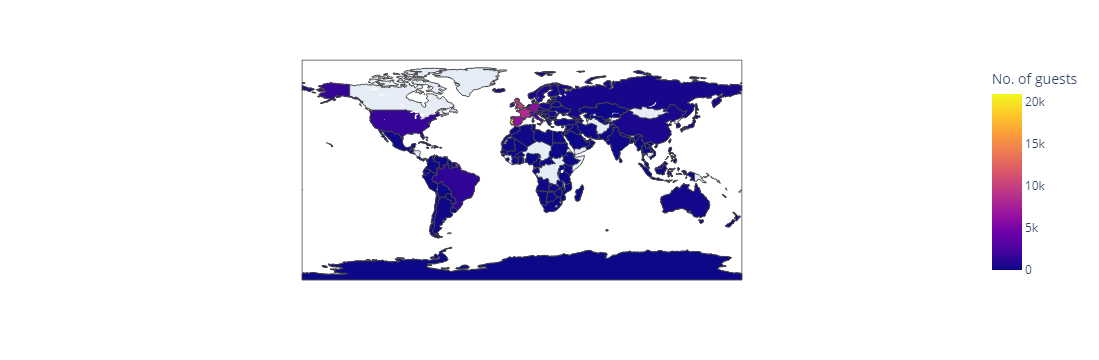

In [137]:

import folium
from folium.plugins import HeatMap
import plotly.express as px

basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['Country'],
                           color = country_wise_guests['No. of guests'], hover_name = country_wise_guests['Country'])
guests_map.show()

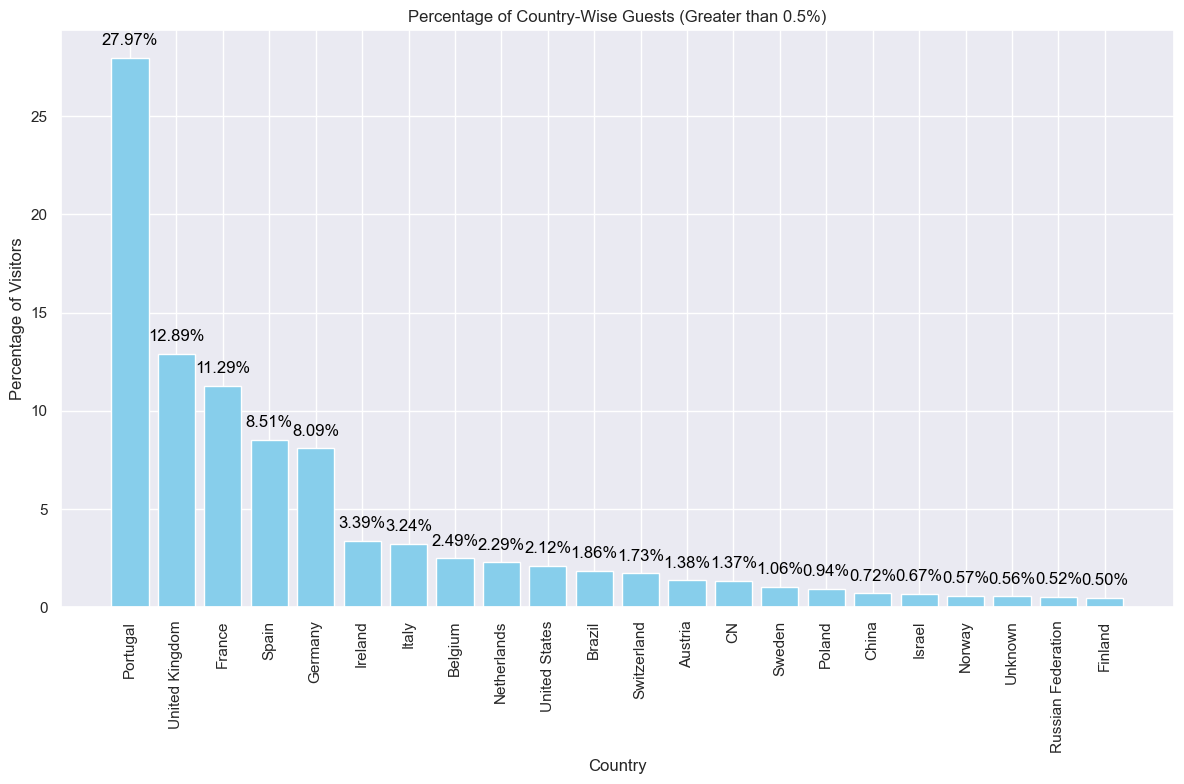

In [157]:
import matplotlib.pyplot as plt

# Sort the data to include only countries with percentage greater than 0.5%
sort = country_wise_guests[country_wise_guests['percentage'] > 0.5]

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = plt.bar(sort['Country full name'], sort['percentage'], color='skyblue')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Percentage of Visitors')
plt.title('Percentage of Country-Wise Guests (Greater than 0.5%)')
plt.xticks(rotation=90)

# Calculate and annotate the percentage on the bars
percent = (sort['No. of guests'] / sort['No. of guests'].sum()) * 100
for i, p in enumerate(sort['percentage']):
    plt.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom', color='black')

# Use a dark theme (optional)
plt.style.use('dark_background')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


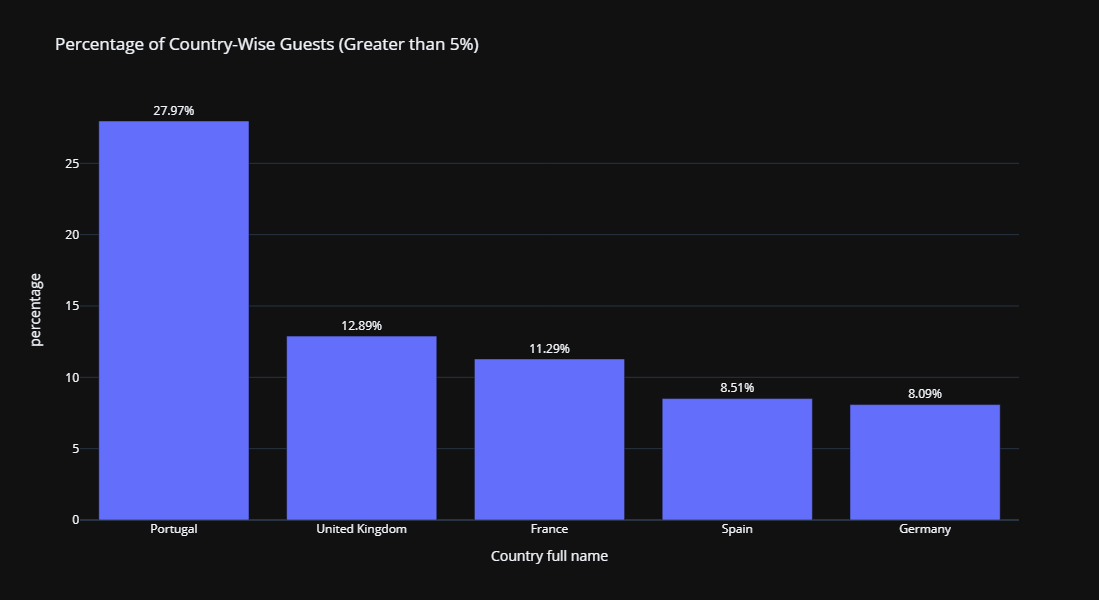

In [171]:
import plotly.express as px

# Sort the data to include only countries with percentage greater than 0.5%
sort = country_wise_guests[country_wise_guests['percentage'] > 5]

# Create the bar plot with plotly
fig = px.bar(sort, x='Country full name', y='percentage',
             title='Percentage of Country-Wise Guests (Greater than 5%)', 
             template='plotly_dark', height = 600)

# Add text annotations for percentages on the bars
fig.update_traces(text=sort['percentage'].apply(lambda x: f'{x:.2f}%'),
                  textposition='outside')

# Show the plot
fig.show()


## Most busy months for resort and hotels.

In [173]:
#create a seperate data frame for resort guests and city hotel guests.

data_resort = df_clean[(df_clean['hotel'] == 'Resort Hotel') & (df_clean['is_canceled'] == 0)]
data_city = df_clean[(df_clean['hotel'] == 'City Hotel') & (df_clean['is_canceled'] == 0)]

In [186]:
#Pull out the number of visitors in a given month overall a year for resort.

resort_monthly = data_resort['arrival_date_month'].value_counts().reset_index()
resort_monthly.columns=['Month','No of guests']
resort_monthly

,Month,No of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [187]:
#Pull out the number of visitors in a given month overall a year for city hotel.

city_monthly = data_city['arrival_date_month'].value_counts().reset_index()
city_monthly.columns = [ 'Month', 'No. of guests']
city_monthly

,Month,No. of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [192]:
#Now merge the above data frames 

final_guests = resort_monthly.merge(city_monthly, on = "Month")
final_guests.columns = ['Month', 'No. of guests in resort', ' No. of guests in city hotel']
final_guests

,Month,No. of guests in resort,No. of guests in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [194]:
# The data frame doesn't have months sorted in order. so we'll provide hierarchy.

import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

final_guests = sort_month( final_guests, 'Month')
final_guests

,Month,No. of guests in resort,No. of guests in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


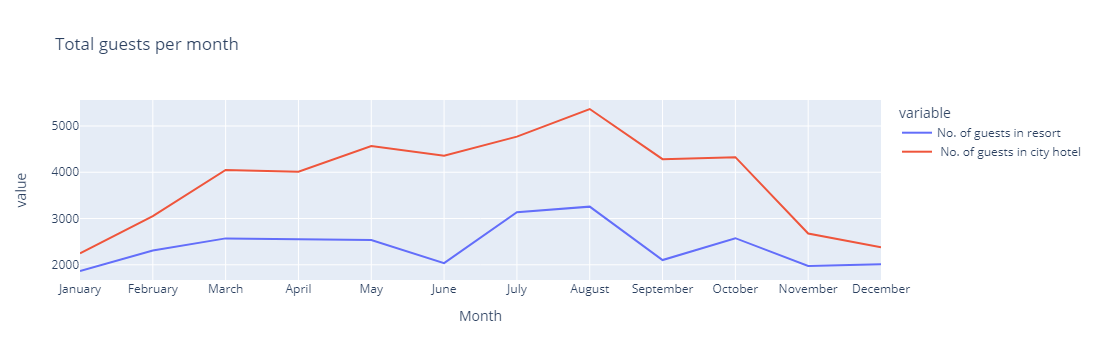

In [195]:
#plot the graph.

px.line(final_guests, x= 'Month', y = ['No. of guests in resort', ' No. of guests in city hotel'], 
       title = ' Total guests per month')

## How long people stay.

In [211]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

C:\Users\syeda\AppData\Local\Temp\ipykernel_17952\389164862.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


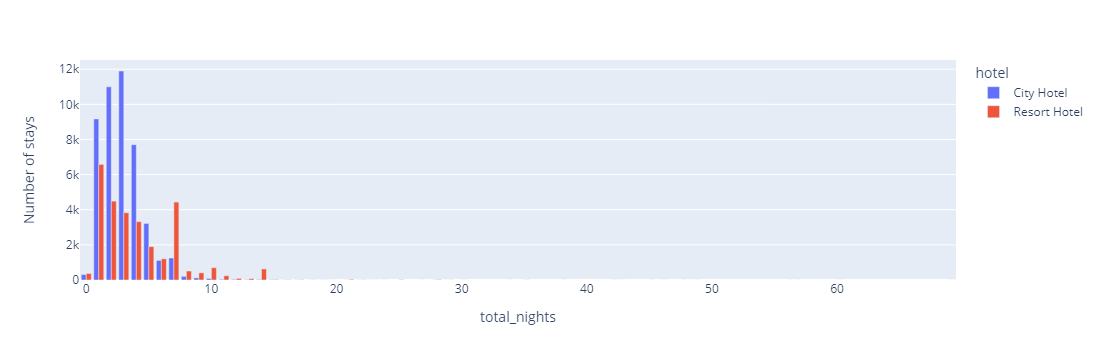

In [217]:
fil = stay[stay['total_nights']>15]

px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        )

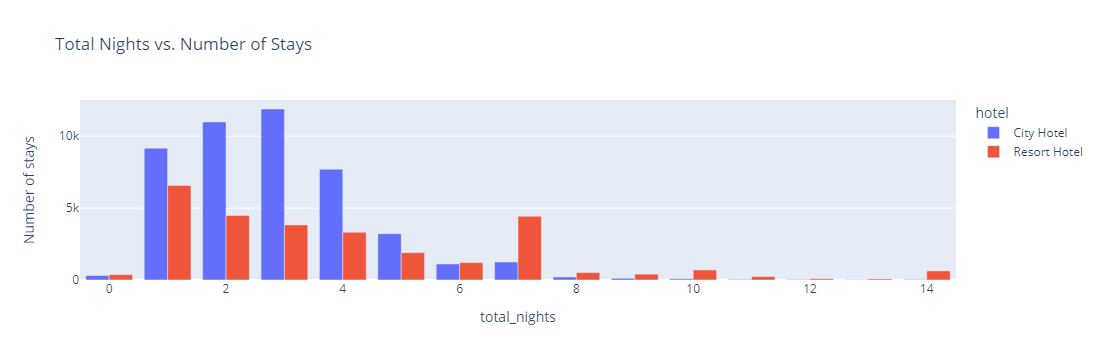

In [230]:
fil= stay[stay['total_nights']<15]

figg = px.bar(data_frame = fil, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group', title= ' Total Nights vs. Number of Stays '
        )

figg.show()


In [231]:
fil

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
5,2,Resort Hotel,4488
6,3,City Hotel,11895
7,3,Resort Hotel,3830
8,4,City Hotel,7704
9,4,Resort Hotel,3321


## CANCELLATION RELATED EDA:

### Cancellation rate:


First we'll feature engineer the arrival month, week and date into one feature.

In [243]:
# Copy hotel dataframe into a new one that will be engineered
hotel_eng1 = pd.DataFrame()
hotel_eng1 = df_clean.copy()

In [244]:
# First lets start by transforming the months colum into a numerical one mapping the names of the months into the month number
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Map month names to month numbers using the dictionary
hotel_eng1['arrival_date_month'] = hotel_eng1['arrival_date_month'].map(month_to_number)

# Lets combine the 3 arrival columns into a single one named arrival_date 
hotel_eng1['arrival_date'] = pd.to_datetime(hotel_eng1['arrival_date_year'].astype(str) + '-' + 
                                    hotel_eng1['arrival_date_month'].astype(str) + '-' + 
                                    hotel_eng1['arrival_date_day_of_month'].astype(str))


In [ ]:
# we now have the arrive month as a number the column, redundant with arrival_date_week_number so drop (strong correlation, bad for ML models input)
hotel_eng1.drop(columns=['arrival_date_week_number'], inplace= True )
hotel_eng1.head()

C:\Users\syeda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\syeda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



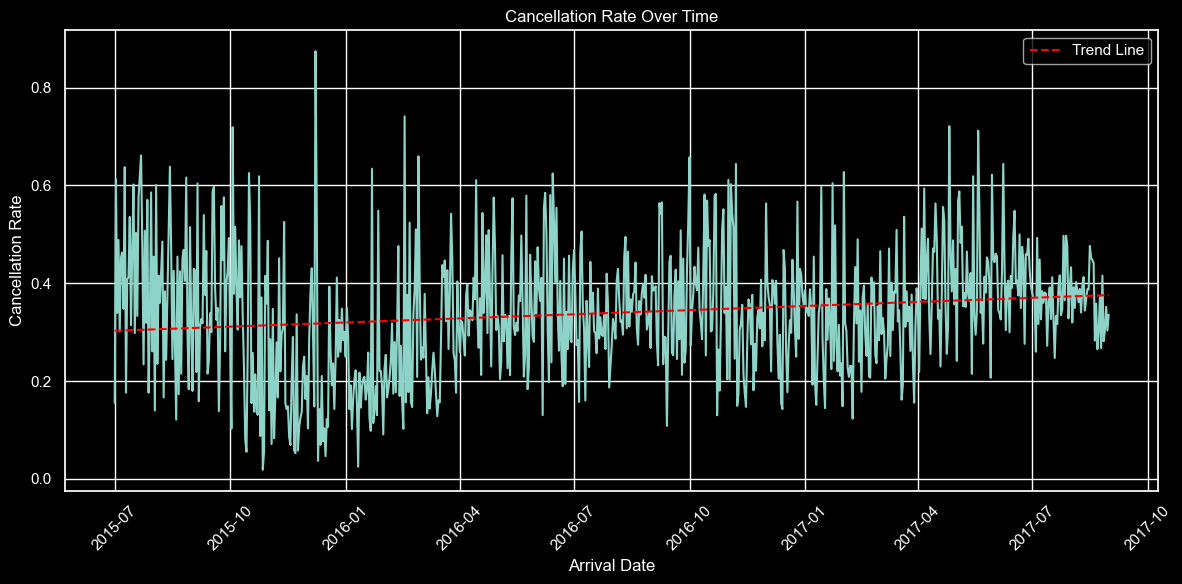

In [250]:
# showing the cancelation rate to have a notion of the structure 
cancellation_rate_by_date = hotel_eng1.groupby('arrival_date')['is_canceled'].mean()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=cancellation_rate_by_date.index, y=cancellation_rate_by_date.values)

# Fit a trend line (linear regression)
trend_x = np.arange(len(cancellation_rate_by_date))
trend_y = np.poly1d(np.polyfit(trend_x, cancellation_rate_by_date.values, 1))(trend_x)
plt.plot(cancellation_rate_by_date.index, trend_y, color='red', linestyle='--', label='Trend Line')

plt.title('Cancellation Rate Over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Cancellation distribution

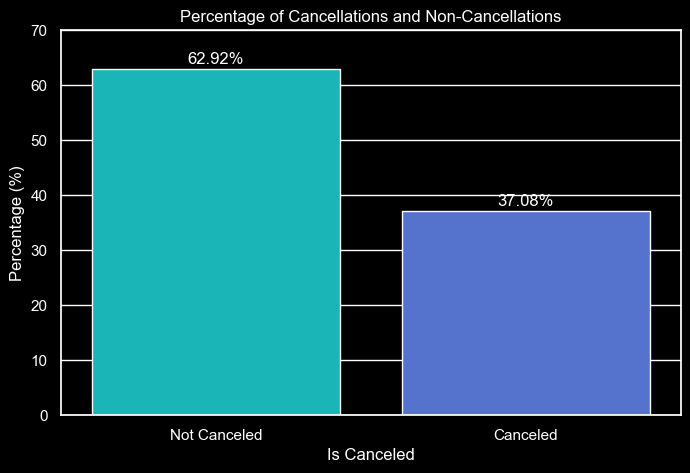

In [259]:
cancel_percent = hotel_eng1['is_canceled'].value_counts(normalize = True) *100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=cancel_percent.index, y=cancel_percent, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(cancel_percent):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

### Cancellation per month

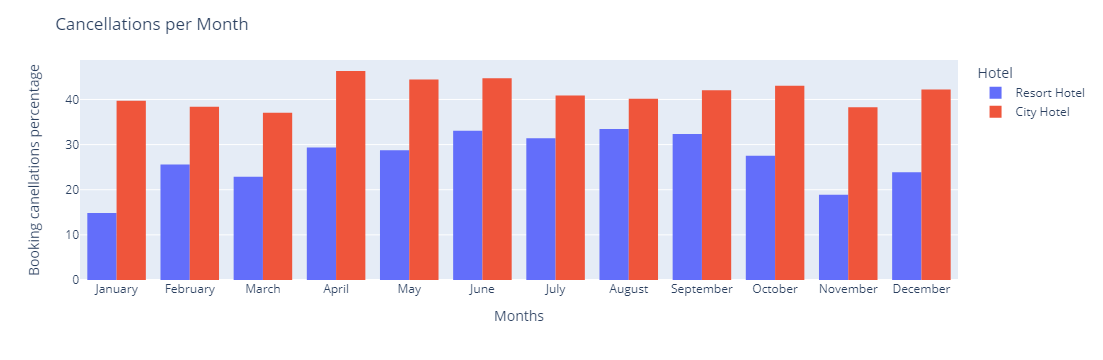

In [406]:
import plotly.express as px

# Create a DateFrame with the relevant data:
res_book_per_month =  df_clean.loc[(df_clean["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df_clean.loc[(df_clean["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = df_clean.loc[(df_clean["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df_clean.loc[(df_clean["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})

cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

sorted_res = sort_month(res_cancel_data, "Month")
sorted_cty = sort_month(cty_cancel_data, "Month")
full_cancel_data = pd.concat([sorted_res, sorted_cty], ignore_index=True)

full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

graph=px.histogram(full_cancel_data, x = "Month", y = "cancel_percent", color='Hotel', barmode = "group")
graph.update_layout(
    xaxis_title="Months",
    yaxis_title="Booking canellations percentage",
    title="Cancellations per Month"
)


### Effect of deposit type on the cancellation

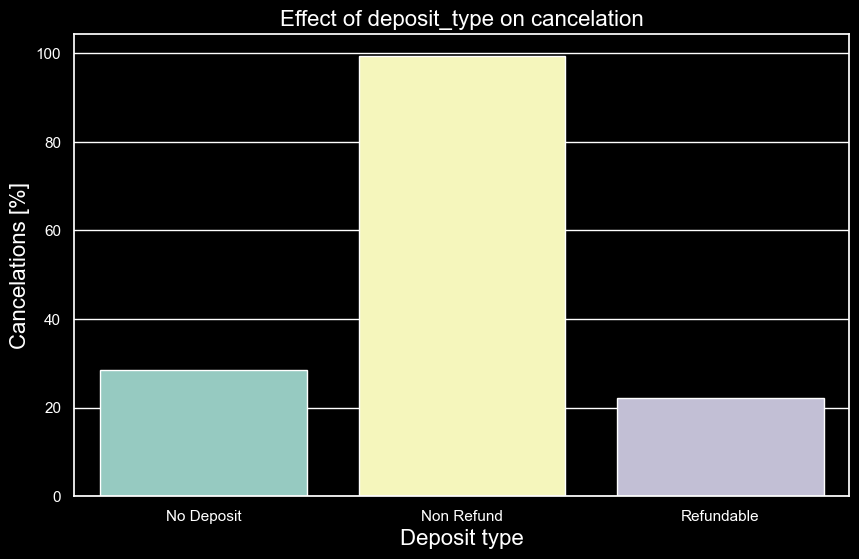

In [303]:
# group data for deposit_type:
deposit_cancel_data = df_clean.groupby("deposit_type")["is_canceled"].describe()

#show figure:
plt.figure(figsize=(10, 6))
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data["mean"] * 100)
plt.title("Effect of deposit_type on cancelation", fontsize=16)
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

### Lead time effect on the cancellation rate

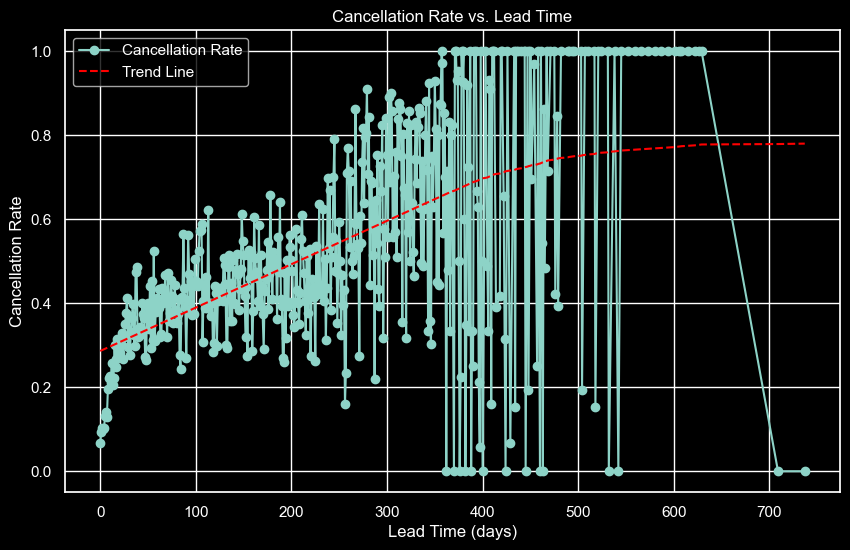

In [401]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage of cancellations for each lead time
lead_time_cancel = df_clean.groupby('lead_time')['is_canceled'].mean()

# Plotting the data using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(lead_time_cancel.index, lead_time_cancel.values, marker='o', linestyle='-', label='Cancellation Rate')

# Fit a trend line (linear regression)
trend_x = np.arange(len(lead_time_cancel))
trend_y = np.poly1d(np.polyfit(trend_x, lead_time_cancel.values, 1))(trend_x)
plt.plot(lead_time_cancel.index, trend_y, color='red', linestyle='--', label='Trend Line')

plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate vs. Lead Time')
plt.grid(True)
plt.legend()
plt.show()


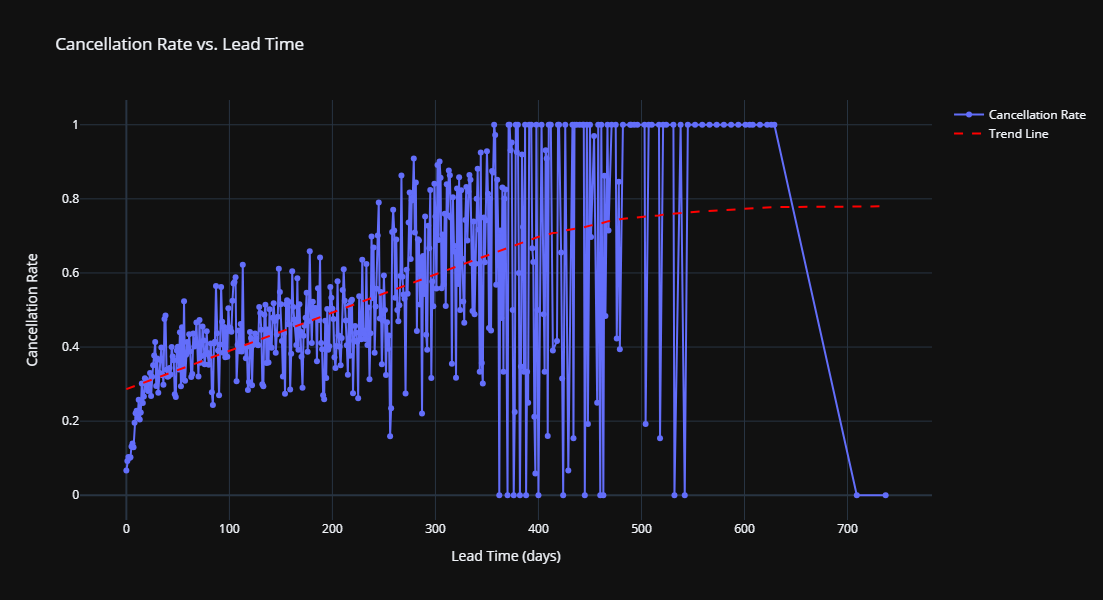

In [405]:
import plotly.graph_objs as go
import numpy as np

# Calculate the percentage of cancellations for each lead time
lead_time_cancel = df_clean.groupby('lead_time')['is_canceled'].mean()

# Fit a trend line (linear regression)
trend_x = np.arange(len(lead_time_cancel))
trend_y = np.poly1d(np.polyfit(trend_x, lead_time_cancel.values, 1))(trend_x)

# Create the plot
fig = go.Figure()

# Add the original data points
fig.add_trace(go.Scatter(
    x=lead_time_cancel.index, 
    y=lead_time_cancel.values,
    mode='lines+markers',
    name='Cancellation Rate'
))

# Add the trend line
fig.add_trace(go.Scatter(
    x=lead_time_cancel.index, 
    y=trend_y,
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Trend Line'
))

# Update layout
fig.update_layout(
    title='Cancellation Rate vs. Lead Time',
    xaxis_title='Lead Time (days)',
    yaxis_title='Cancellation Rate',
    template='plotly_dark',
    width= 1000,
    height= 600
)

# Show the plot
fig.show()


## HYPOTHESIS TESTING:

### FIRST HYPOTHESIS: <br>
The likelihood of booking cancellations varies by the months.<br>

Null Hypothesis (H0): The cancellation rate does not significantly differ between months.<br>
Alternative Hypothesis (Ha):There is a significant difference in the cancellation rate between at least some months. 

In [417]:
import pandas as pd
from scipy.stats import pearsonr, linregress

# Assuming df_clean is your DataFrame
# Calculate Pearson correlation
corr, p_value_corr = pearsonr(df_clean['lead_time'], df_clean['is_canceled'])
print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value_corr:.4f}")

# Alternatively, fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(df_clean['lead_time'], df_clean['is_canceled'])
print(f"Linear regression p-value: {p_value:.4f}")


Pearson correlation coefficient: 0.2929
P-value: 0.0000
Linear regression p-value: 0.0000


### CONCLUSION:

Months with Highly Significant Results: The months with very low p-values indicate strong evidence that the cancellation rates for these months are significantly different from the average cancellation rate of the other months. Specifically, January, March, November, June, April, February, May, September, and December all show strong statistical significance.
Non-Significant Result: July has a p-value greater than 0.05, indicating that the cancellation rate for July is not significantly different from the average cancellation rate of the other months. 

Therefore, we do not reject the hypothesis that the cancellation rate varies by month, but we note that July does not show a significant difference compared to other months.


### SECOND HYPOTHESIS:
Certain market segments have higher cancellation rates. <br>

Null Hypothesis (H0): There is no significant difference in the cancellation rates among different market segments. <br>
Alternative Hypothesis (Ha): There is a significant difference in the cancellation rates among at least some market segments.

In [424]:
from scipy.stats import ttest_ind

# Create a function to conduct t-test and return results
def t_ind_test(s1: pd.Series, s2: pd.Series, equal_var=False) -> tuple:
    """
    Returns t-value and p-value
    """
    t_val, p_val = ttest_ind(s1, s2, equal_var=equal_var)
    return t_val, p_val

def test_market_segments(data: pd.DataFrame, segment_col: str) -> pd.DataFrame:
    """
    Returns a DataFrame of t-test results for each market segment compared to the rest.
    """
    segments = data[segment_col].unique()
    test_results = []

    # Compare each segment to the rest
    for segment in segments:
        segment_data = data[data[segment_col] == segment]['is_canceled']
        rest_data = data[data[segment_col] != segment]['is_canceled']
        t_val, p_val = t_ind_test(segment_data, rest_data)
        test_results.append((segment, t_val, p_val))

    test_results_df = (pd.DataFrame(test_results, columns=['Market Segment', 't-value', 'p-value'])
                       .sort_values('p-value')
                       .set_index('Market Segment')
    )
    return test_results_df

# Assuming 'market_segment' is the column in your DataFrame that holds market segment information
market_segment_results = test_market_segments(df_clean, 'market_segment')
print("Market Segments Test Results:")
print(market_segment_results)


Market Segments Test Results:
                   t-value        p-value
Market Segment                           
Direct          -68.407863   0.000000e+00
Groups           76.447182   0.000000e+00
Undefined       449.797421   0.000000e+00
Corporate       -34.459408  8.402745e-238
Complementary   -20.444680   4.069585e-74
Offline TA/TO   -10.026756   1.244111e-23
Aviation         -5.512365   9.284044e-08
Online TA        -2.152140   3.138832e-02


C:\Users\syeda\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



### CONCLUSION:
Since all p-values are extremely small (below the conventional alpha level of 0.05), we reject the null hypothesis for all market segments. This indicates that there are significant differences in the cancellation rates across different market segments.


### THIRD HYPOTHESIS:

The likelihood of booking cancellations varies by the months. <br>
Null Hypothesis (H0): There is no correlation between lead time and cancellation rate. <br>
Alternative Hypothesis (Ha): There is a significant correlation between lead time and cancellation rate.

In [426]:
import pandas as pd
from scipy.stats import ttest_ind

def t_ind_test(s1: pd.Series, s2: pd.Series, equal_var=False) -> tuple:
    """
    Returns t-value and p-value
    """
    t_val, p_val = ttest_ind(s1, s2, equal_var=equal_var)
    return t_val, p_val

def test_cancellation_by_month(data: pd.DataFrame) -> pd.DataFrame:
    """
    Returns a DataFrame of t-test results comparing cancellation rates by month.
    """
    months = data['arrival_date_month'].unique()
    test_results = []
    
    # Compare each month to the rest
    for month in months:
        month_data = data[data['arrival_date_month'] == month]['is_canceled']
        rest_data = data[data['arrival_date_month'] != month]['is_canceled']
        t_val, p_val = t_ind_test(month_data, rest_data)
        test_results.append((month, t_val, p_val))
    
    test_results_df = (pd.DataFrame(test_results, columns=['Month', 't-value', 'p-value'])
                       .sort_values('p-value')
                       .set_index('Month')
    )
    return test_results_df

# Assuming 'df_clean' is your DataFrame and 'arrival_date_month' is the column for months
month_cancellation_results = test_cancellation_by_month(df_clean)
print("Cancellation Rate by Month Test Results:")
print(month_cancellation_results)


Cancellation Rate by Month Test Results:
             t-value       p-value
Month                             
January   -11.242033  4.641163e-29
March     -10.669682  1.866189e-26
November  -10.508271  1.180510e-25
June        9.836049  9.437055e-23
April       8.350548  7.459167e-17
February   -7.139893  1.003932e-12
May         6.145385  8.187140e-10
September   4.651028  3.336525e-06
December   -3.619827  2.967134e-04
October     2.317563  2.048796e-02
August      1.823674  6.821832e-02
July        0.953109  3.405497e-01


### CONCLUSION:

With a Pearson correlation coefficient of 0.2929, there is a positive correlation between lead time and cancellation rate, suggesting that as the lead time increases, the cancellation rate also tends to increase.
Null Hypothesis is rejected because the correlation is significantly different from zero.
Alternative Hypothesis is accepted: There is a significant positive correlation between lead time and cancellation rate.
Thus, the analysis supports the hypothesis that guests with higher lead times are more likely to cancel their bookings.
Thus, the analysis supports the hypothesis that guests with higher lead times are more likely to cancel their bookings.
